Question 3

a)

In [4]:
pip install numpy

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# array of x values from -5π to 7π (step size = 0.1)
x = np.arange(-5*np.pi, 7*np.pi, 0.1)

In [8]:
# Calculating the y values for the function 
y = x * np.cos(x/2)

In [5]:
# function to format the graph
def format():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [6]:
def format_2():
    # formatting
    plt.legend(loc='upper left')
    plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


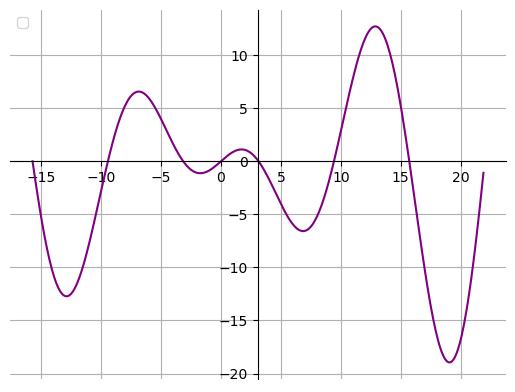

In [11]:
format()
plt.plot(x, y, color="purple")
format_2()

b)

𝑓(𝑥) = 𝑐𝑜𝑠(π/2) + (𝑥 - π/2) 𝑐𝑜𝑠'(π/2) + (𝑥 - π/2)^2 𝑐𝑜𝑠''(π/2) / 2! + (𝑥 - π/2)^3 𝑐𝑜𝑠'''(π/2) / 3! + ..
𝑓(𝑥) = 1 + (𝑥 - π/2)^2 / 2! - (𝑥 - π/2)^4 / 4! + (𝑥 - π/2)^6 / 6! - ...

In [12]:
import math

In [13]:
result = 0
# calculating the taylor series expansion for 6 terms
for i in range(6):
    term = (-1)**i / math.factorial(2*i) * (x - math.pi/2)**(2*i)
    result = result+term

# converting the expansion to a string
str = "cos(x) ≈ "
for i in range(6):
    if i > 0:
        str += " + "
    str += "({} / {}) * (x - {})^{}".format((-1)**i, math.factorial(2*i), math.pi/2, 2*i)
    
print(str)

cos(x) ≈ (1 / 1) * (x - 1.5707963267948966)^0 + (-1 / 2) * (x - 1.5707963267948966)^2 + (1 / 24) * (x - 1.5707963267948966)^4 + (-1 / 720) * (x - 1.5707963267948966)^6 + (1 / 40320) * (x - 1.5707963267948966)^8 + (-1 / 3628800) * (x - 1.5707963267948966)^10


c)

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')
eq = sym.cos(x)

In [3]:
ms=np.empty(60,dtype=object) # 60
xrange=np.linspace(-5*np.pi,7*np.pi,500)
y=np.zeros([61,500]) # 61

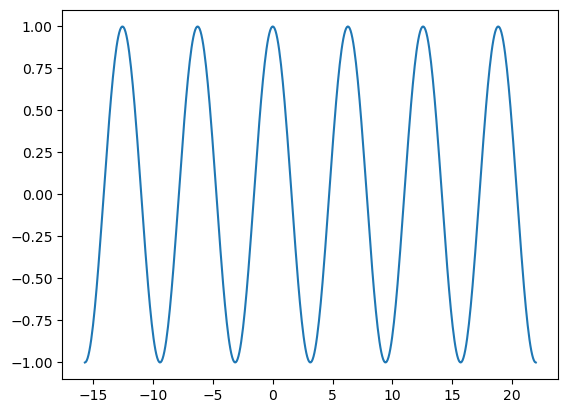

In [8]:
ms[0] = eq.subs(x,0)
# print(ms[0])
f = sym.lambdify(x,ms[0],'numpy')
y[0,:] = f(xrange)
for n in range(1,60):
    ms[n] = ms[n-1]+(eq.diff(x,n).subs(x,np.pi/2)*((n-np.pi/2)**2)/(np.math.factorial(n)))
#     print((n+1),".",ms[n])
    f=sym.lambdify(x,ms[n],'numpy')
    y[n,:] = f(xrange)
    
f = sym.lambdify(x,eq,'numpy')
y[60,:]=f(xrange)
# plt.plot(xrange,y[0,:])
# plt.plot(xrange,y[4,:])
# plt.plot(xrange,y[9,:])
# format()
plt.plot(xrange,y[60,:])
# plt.legend(["1","5","10","func"])
plt.show()
# format_2()

d)

In [9]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

x = sym.symbols('x')
eq = sym.cos(x)

ms=np.empty(1000,dtype=object) # 60
xrange=np.linspace(20,-20,500)
y=np.zeros([1001,500]) # 61

ms[0] = eq.subs(x,0)
f = sym.lambdify(x,ms[0],'numpy')
y[0,:] = f(xrange)
for n in range(1,1000):
    ms[n] = ms[n-1]+(eq.diff(x,n).subs(x,np.pi/6)*((np.pi/6)**n)/(np.math.factorial(n)))
    f=sym.lambdify(x,ms[n],'numpy')
    y[n,:] = f(xrange)

f = sym.lambdify(x,eq,'numpy')
y[1000,:]=f(xrange)

# plt.plot(xrange,y[0,:])
# plt.plot(xrange,y[4,:])
# plt.plot(xrange,y[9,:])
# plt.plot(xrange,y[14,:])
# plt.plot(xrange,y[19,:])
# plt.plot(xrange,y[24,:])
# plt.plot(xrange,y[1000,:])
# # plt.legend(["1","5","10","15","20","25","1000"])
# plt.show()

actual_value = np.pi/3*np.cos(np.pi/6)
error = abs(ms[999] - actual_value)
print("actual value: ",actual_value)
print("absolute error: ",error)

actual value:  0.9068996821171089
absolute error:  0.272925085901547


The absolute error gives us a measure of how 
close the approximation is to the actual value. 
A smaller absolute error indicates a better approximation.
Since the absolute error in this case is 0.2729, we can say 
that it is close to the actual value.